In [1]:
import tensorflow as tf
keras=tf.keras
layers=keras.layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()

In [4]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
x_test.shape,x_train.shape

((10000, 784), (60000, 784))

In [5]:
x_train=tf.cast(x_train,tf.float32)/255
x_test=tf.cast(x_test,tf.float32)/255

In [6]:
factor=0.5
x_train_noise=x_train+np.random.normal(size=x_train.shape)*factor
x_test_noise=x_test+np.random.normal(size=x_test.shape)*factor

In [7]:
x_train_noise=np.clip(x_train_noise,0. , 1.)
x_test_noise=np.clip(x_test_noise,0.,1.)

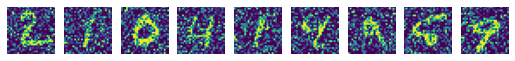

In [11]:
plt.figure(figsize=(10, 2))
for i in range(1,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

In [12]:
input_size=784
hidden_size=32
output_size=784
input=keras.layers.Input(shape=(input_size,))
en=layers.Dense(hidden_size,activation='swish')(input)
de=layers.Dense(output_size,activation='sigmoid')(en)
model=keras.Model(inputs=input,outputs=de)

In [13]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
model.fit(x_train_noise,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test_noise,x_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0228 - mae: 0.0655 - val_loss: 0.0225 - val_mae: 0.0649
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0226 - mae: 0.0653 - val_loss: 0.0224 - val_mae: 0.0647
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0225 - mae: 0.0651 - val_loss: 0.0223 - val_mae: 0.0646
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0224 - mae: 0.0649 - val_loss: 0.0222 - val_mae: 0.0642
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0223 - mae: 0.0647 - val_loss: 0.0221 - val_mae: 0.0640
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0222 - mae: 0.0645 - val_loss: 0.0220 - val_mae: 0.0640
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0221 - mae: 0.0643 - val_loss: 0.0219 - val_mae: 0.0643
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.

In [17]:
encode=keras.Model(inputs=input,outputs=en)
input_de=keras.layers.Input(shape=(hidden_size,))
output_de=model.layers[-1](input_de)
decode=keras.Model(inputs=input_de,outputs=output_de)
x_test_1=encode(x_test_noise)

In [18]:
decode1=decode.predict(x_test_1)
decode1.shape

(10000, 784)

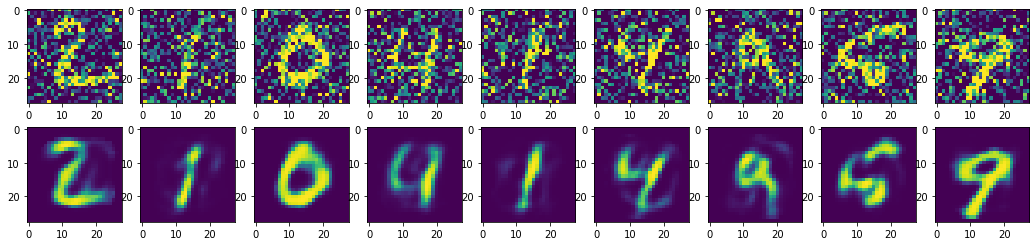

In [19]:
import numpy as np
n=10
plt.figure(figsize=(20,4))
for i in range(1,n):
    ax=plt.subplot(2,n,i)
    plt.imshow(np.reshape(x_test_noise[i],(28,28)))
    ax=plt.subplot(2,n,i+n)
    plt.imshow(decode1[i].reshape(28,28))